# Основы EDA

Автор: **Булыгин Олег**
* [Я в LinkedIn](https://www.linkedin.com/in/obulygin/)  
* [Мой канал в ТГ по Python](https://t.me/pythontalk_ru)
* [Чат канала](https://t.me/pythontalk_chat)
* [Блог в Телетайпе](https://teletype.in/@pythontalk)

Разведочный анализ данных (EDA) - анализ основных свойств данных, нахождение в них общих закономерностей, распределений и аномалий, построение начальных моделей, зачастую с использованием инструментов визуализации.

Концепция EDA разработана американским математиком Джоном Тьюки еще в 1970-х годах, и до сих пор является важным этапом аналитических работа.

Джон Тьюки выделял следующие цели EDA:
- максимальное «проникновение» в данные,
- выявление основных структур,
- выбор наиболее важных переменных,
- обнаружение отклонений и аномалий,
- проверка основных гипотез,
- разработка начальных моделей.

Для примера будем использовать набор данных о клиентах автостраховой компании.

In [ ]:
# импортируем библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/obulygin/content/main/car_insurance_data/car_insurance_data.csv")

In [ ]:
# Посмотрим на размеры датафрейма
df.shape

(10000, 19)

In [ ]:
df.head()

,id,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,DUIs,past_accidents,outcome
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,True,after 2015,False,True,10238,12000.0,sedan,0,0,0,False
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,False,before 2015,False,False,10238,16000.0,sedan,0,0,0,True
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,True,before 2015,False,False,10238,11000.0,sedan,0,0,0,False
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,True,before 2015,False,True,32765,11000.0,sedan,0,0,0,False
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,True,before 2015,False,False,32765,12000.0,sedan,2,0,1,True


Используя метод `info()`, мы можем получить больше информации о наборе данных, включая имена всех столбцов и соответствующие им типы данных, а также количество непропущенных значений.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  object 
 2   gender               10000 non-null  object 
 3   race                 10000 non-null  object 
 4   driving_experience   10000 non-null  object 
 5   education            10000 non-null  object 
 6   income               10000 non-null  object 
 7   credit_score         9018 non-null   float64
 8   vehicle_ownership    10000 non-null  bool   
 9   vehicle_year         10000 non-null  object 
 10  married              10000 non-null  bool   
 11  children             10000 non-null  bool   
 12  postal_code          10000 non-null  int64  
 13  annual_mileage       9043 non-null   float64
 14  vehicle_type         10000 non-null  object 
 15  speeding_violations  10000 non-null  


**[df.describe()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)** - Выводит описательные статистики по числовым столбцам датафрейма. Описательные статистики включают в себя
- `count` - количество не пустых значений
- `mean` - среднее арифметическое
- `std` - стандартное отклонение
- `min`, `max` - минимум и максимум
- 25%, 50%, 75% - соотвествующие квартили  


Из статистик автоматически исключаются `NaN` значения, если они есть.

In [ ]:
df.describe()

,id,credit_score,postal_code,annual_mileage,speeding_violations,DUIs,past_accidents
count,10000.000000,9018.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000
mean,500521.906800,0.515813,19864.548400,11697.003207,1.482900,0.23920,1.056300
std,290030.768758,0.137688,18915.613855,2818.434528,2.241966,0.55499,1.652454
min,101.000000,0.053358,10238.000000,2000.000000,0.000000,0.00000,0.000000
25%,249638.500000,0.417191,10238.000000,10000.000000,0.000000,0.00000,0.000000
50%,501777.000000,0.525033,10238.000000,12000.000000,0.000000,0.00000,0.000000
75%,753974.500000,0.618312,32765.000000,14000.000000,2.000000,0.00000,2.000000
max,999976.000000,0.960819,92101.000000,22000.000000,22.000000,6.00000,15.000000


# Подготовка данных

## Работа с пропусками

Начнем с проверки набора данных на наличие пропусков. Для этого мы можем использовать метод `isna()`, который возвращает массив с булевыми значениями, указывающими, является ли значение пропуском или нет. Чтобы посчитать долю пропусков, применяем метод `mean()`.

In [ ]:
df.isna().mean() * 100

id                     0.00
age                    0.00
gender                 0.00
race                   0.00
driving_experience     0.00
education              0.00
income                 0.00
credit_score           9.82
vehicle_ownership      0.00
vehicle_year           0.00
married                0.00
children               0.00
postal_code            0.00
annual_mileage         9.57
vehicle_type           0.00
speeding_violations    0.00
DUIs                   0.00
past_accidents         0.00
outcome                0.00
dtype: float64

Обычно у нас есть три варианта обработки пропусков: ничего не делать, удалить строки с ними или попытаться восстановить пропуски.

Для замены отсутствующих значений существует много различных методов, и то, какой из них лучше всего подходит, обычно зависит от характеристик набора данных и от цели анализа. Один из самых простых методов заключается в замене пропущенных значений в каждом столбце расчетными статистиками.

Для принятия решения о том, что делать с пропусками, рассмотрим возможную взаимосвязь признака с другими.

In [ ]:
df.groupby("income")["credit_score"].median()

income
middle class     0.526747
poverty          0.349915
upper class      0.616289
working class    0.431376
Name: credit_score, dtype: float64

Мы видим, что кредитный рейтинг отличается по уровням дохода, есть зависимосить.

In [ ]:
df["credit_score"] = df["credit_score"].fillna(df.groupby("income")["credit_score"].transform('median'))

In [ ]:
df.isna().mean() * 100

id                     0.00
age                    0.00
gender                 0.00
race                   0.00
driving_experience     0.00
education              0.00
income                 0.00
credit_score           0.00
vehicle_ownership      0.00
vehicle_year           0.00
married                0.00
children               0.00
postal_code            0.00
annual_mileage         9.57
vehicle_type           0.00
speeding_violations    0.00
DUIs                   0.00
past_accidents         0.00
outcome                0.00
dtype: float64

Отличается ли пробег по позрасту?

In [ ]:
df.groupby("age")["annual_mileage"].median()

age
16-25    13000.0
26-39    12000.0
40-64    11000.0
65+      11000.0
Name: annual_mileage, dtype: float64

In [ ]:
df["annual_mileage"] = df["annual_mileage"].fillna(df.groupby("age")["annual_mileage"].transform('median'))

df.isna().mean() * 100

id                     0.0
age                    0.0
gender                 0.0
race                   0.0
driving_experience     0.0
education              0.0
income                 0.0
credit_score           0.0
vehicle_ownership      0.0
vehicle_year           0.0
married                0.0
children               0.0
postal_code            0.0
annual_mileage         0.0
vehicle_type           0.0
speeding_violations    0.0
DUIs                   0.0
past_accidents         0.0
outcome                0.0
dtype: float64

## Исключение неиформатированных столбцов

Столбцы "id" и "postal_code" не важны для нашего анализа, поэтому мы можем избавиться от них с помощью метода `drop()`.

In [ ]:
df = df.drop(["id", "postal_code"], axis=1)

# Исследовательский анализ

## Однофакторный анализ

Однофакторный анализ – это самая простая форма анализа данных. Как следует из названия, он подразумевает расчёты в рамках одного столбца или переменной, в основном используется для описания данных.

Столбец gender относится к категориальным номинальным данным. Значения в данном столбце нет смысла ранжировать и сравнивать друг с другом. Мы можем получить количество каждой категории, используя метод `value_counts()`.

In [ ]:
df["gender"].value_counts()

female    5010
male      4990
Name: gender, dtype: int64

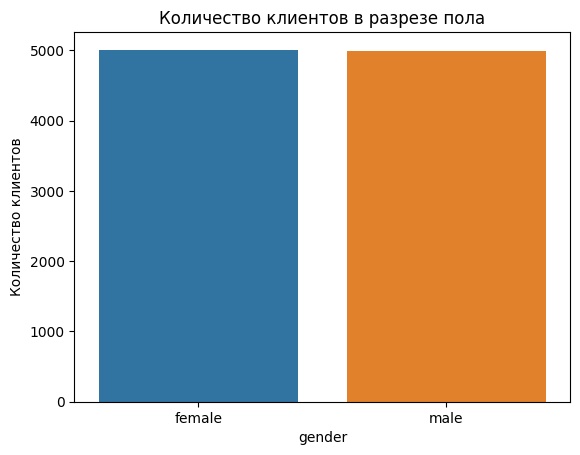

In [ ]:
sns.countplot(data=df, x="gender")
plt.title("Количество клиентов в разрезе пола")
plt.ylabel("Количество клиентов")
plt.show()

Категориальные порядковые данные имеет смысл ранжировать, сравнивать значения друг с другом по принципу "больше-меньше". Образование и доход как раз к ним относятся.

upper class      0.4336
middle class     0.2138
poverty          0.1814
working class    0.1712
Name: income, dtype: float64

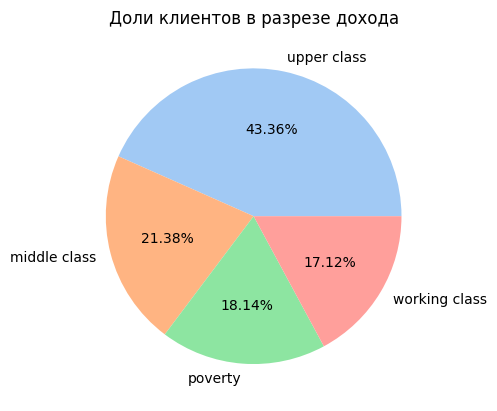

In [ ]:
# посчитаем доли клиентов в разрезе дохода
income = df["income"].value_counts(normalize=True)
display(income)
# зададим цветовую палитру
colors = sns.color_palette('pastel')

plt.pie(income, labels=income.index, colors=colors, autopct='%.2f%%')
plt.title("Доли клиентов в разрезе дохода")
plt.show()

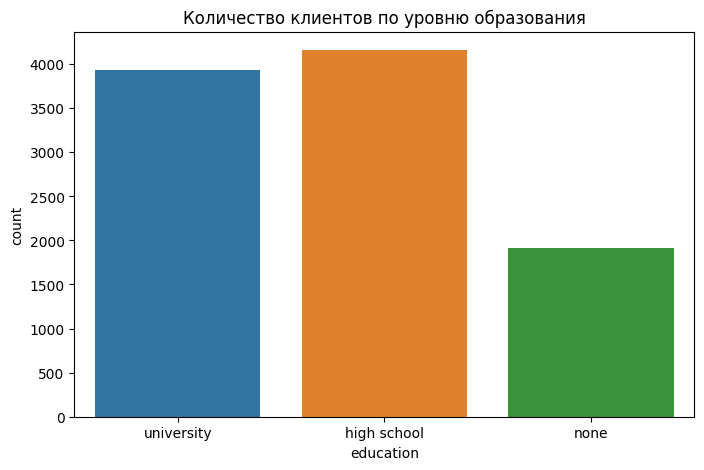

In [ ]:
plt.figure(figsize=[8,5])
sns.countplot(data=df, x="education", order=["university", "high school", "none"])
plt.title("Количество клиентов по уровню образования")
plt.show()

Клиентов со средним образованием больше, чем в любой другой категории, за ними следуют выпускники университетов, а затем клиенты без образования.

Числовые данные обычно анализируются путем вычисления основных статистик, таких как среднее значение, мода, максимум, минимум, стандартное отклонение и т.д. Ещё раз изучим кредитный рейтинг через `describe()`.

In [ ]:
df["credit_score"].describe()

count    10000.000000
mean         0.515429
std          0.134677
min          0.053358
25%          0.421301
50%          0.526747
75%          0.616289
max          0.960819
Name: credit_score, dtype: float64

Построим гистограмму для изучения распределения.

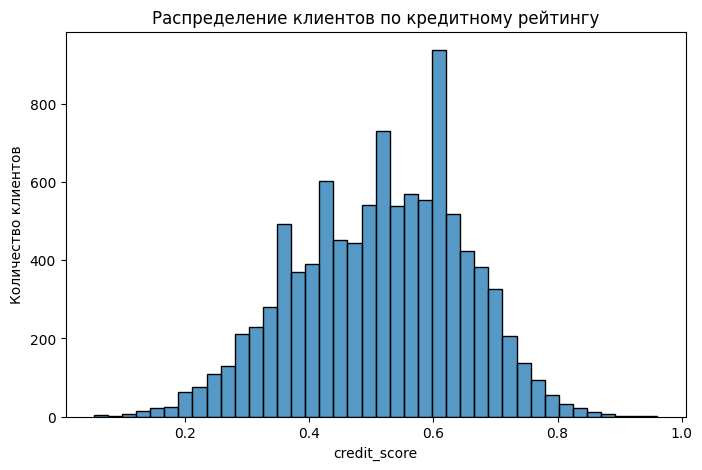

In [ ]:
plt.figure(figsize=[8, 5])
sns.histplot(data=df, x="credit_score", bins=40)
plt.title("Распределение клиентов по кредитному рейтингу")
plt.ylabel("Количество клиентов")
plt.show()

Распределение близко к нормальному. Изучим так же годовой пробег, добавив ядерную оценку плотности.

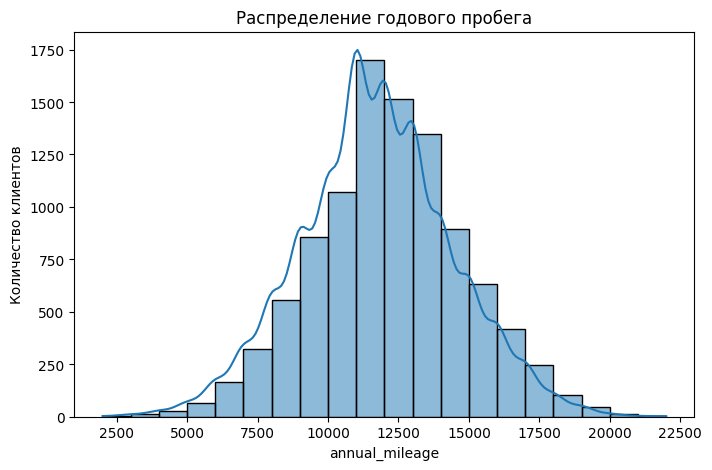

In [ ]:
plt.figure(figsize=[8, 5])
sns.histplot(data=df, x="annual_mileage", bins=20, kde=True)
plt.title("Распределение годового пробега")
plt.ylabel("Количество клиентов")
plt.show()

Тут аналогично распределение близкое к нормальному.

## Двухфакторный анализ

Он предполагает анализ двух признаков. Обычно это способ исследовать взаимосвязи между этими признаками и их влияние друг на друга. Можно изучать взаиосвязь двух числовых признаков, числового с категориальным и двух категориальных признаков, категориального с категориального.

Точечный график – хороший способ изучения взаимосвязи между двумя числовыми признаками. Исследуем взаимосвязь между "annual_mileage" и "speeding_violations".

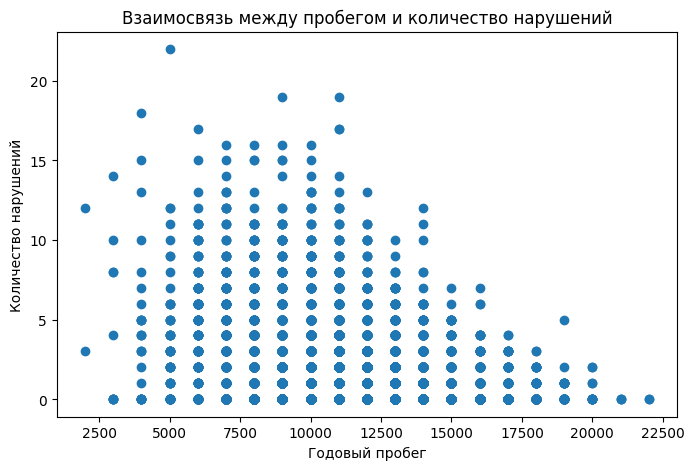

In [ ]:
plt.figure(figsize=[8, 5])
plt.scatter(data=df, x="annual_mileage", y="speeding_violations")
plt.title("Взаимосвязь между пробегом и количество нарушений")
plt.ylabel("Количество нарушений")
plt.xlabel("Годовый пробег")
plt.show()

Можем предположить отрицательную взаимосвязь между пробегом и количество нарушений.

Можем построить матрицу корреляций, чтобы получить более точную информацию о взаимосвязи между этими двумя переменными. Построим матрицу по столбцам "нарушения скоростного режима", "вождение в нетрезвом виде" и "прошлые_аварии".

In [ ]:
corr_matrix_pearson = df[["speeding_violations", "DUIs", "past_accidents"]].corr()
corr_matrix_pearson

,speeding_violations,DUIs,past_accidents
speeding_violations,1.000000,0.359838,0.443074
DUIs,0.359838,1.000000,0.259359
past_accidents,0.443074,0.259359,1.000000


Все наши признаки имеют положительную корреляцию друг с другом, то есть, когда растет одна из них, растет и другая, и наоборот. Между количеством ДТП в прошлом и нарушениями скоростного режима существует умеренная положительная корреляция, а между количеством ДТП в прошлом и вождением в нетрезвом виде – слабая положительная корреляция.

Хорошим способом визуализации корреляции является тепловая карта. Мы можем создать ее, передав матрицу корреляции в функцию `heatmap()` в Seaborn.

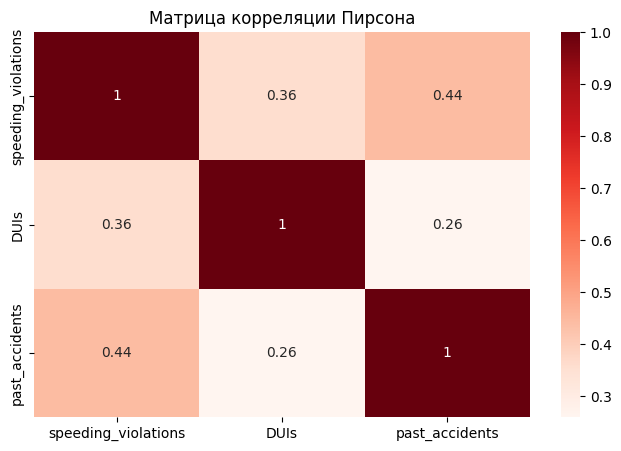

In [ ]:
plt.figure(figsize=[8, 5])
sns.heatmap(corr_matrix_pearson, annot=True, cmap='Reds')
plt.title("Матрица корреляции Пирсона")
plt.show()

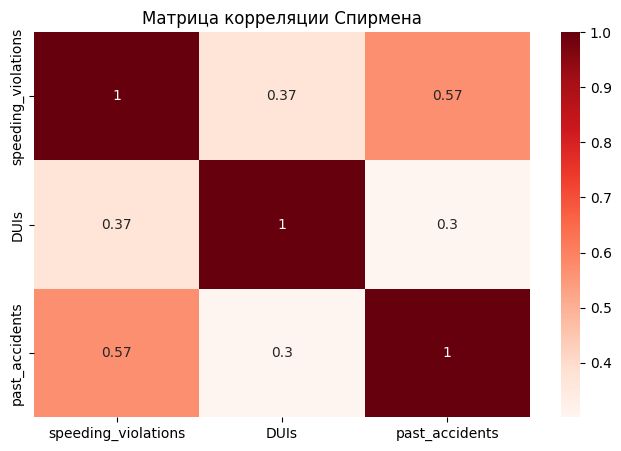

In [ ]:
corr_matrix_spearman = df[["speeding_violations", "DUIs", "past_accidents"]].corr('spearman')
plt.figure(figsize=[8,5])
sns.heatmap(corr_matrix_spearman, annot=True, cmap='Reds')
plt.title("Матрица корреляции Спирмена")
plt.show()

А что если мы хотим изучить взаиосвязь между категориальным столбцом и числовым? Это можно сделать через расчет среднего или медианы для каждого значения категориального столбца. Сначала мы группируем данные по "outcome", а затем вычисляем среднее значение годового пробега для каждой группы.

In [ ]:
df.groupby('outcome')['annual_mileage'].mean()

outcome
False    11354.157565
True     12464.730290
Name: annual_mileage, dtype: float64

Визуализировроать разницу в распределении годового пробега по группам можно при помощи boxplotов.

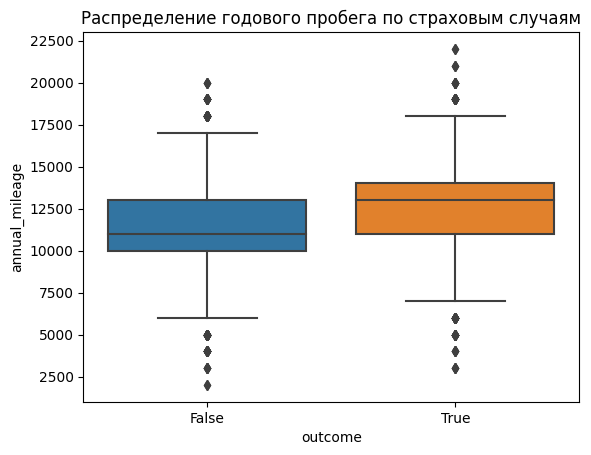

In [ ]:
sns.boxplot(data=df, x='outcome', y='annual_mileage')
plt.title("Распределение годового пробега по страховым случаям")
plt.show()

Обе группы имеют схожие медианы, хотя у клиентов со страховым случаем медианный годовой пробег несколько выше, чем у клиентов без страховых случаев. То же самое можно сказать о первом и третьем квартилях (обозначены нижней и верхней границами коробки соответственно).

Аналогичным образом мы можем сравнить распределения кредитного рейтинга по outcome, но на этот раз мы воспользуемся гистограммой.

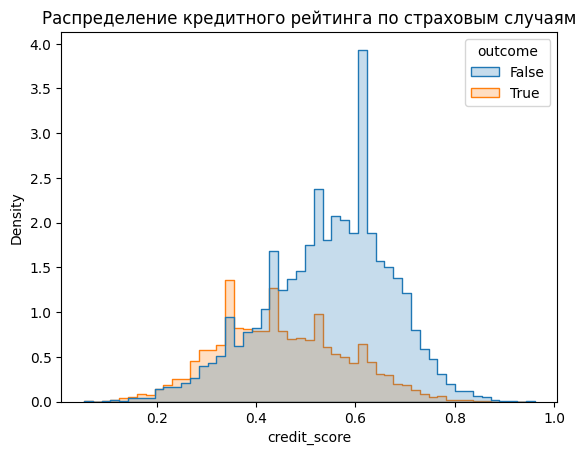

In [ ]:
sns.histplot(df, x="credit_score", hue="outcome", element="step", stat="density")
plt.title("Распределение кредитного рейтинга по страховым случаям")
plt.show()

В качестве базового примера изучения взаимосвязи двух категориальных величин мы рассмотрим, как "outcome" связан с  возрастом и годом выпуска автомобиля. Для начала мы преобразуем значения в столбце "outcome" в "1" и "0" соответственно. Это позволит нам рассчитать долю страховых случаев для любой группы клиентов.

In [ ]:
df['claim_rate'] = np.where(df['outcome']==True, 1, 0)
df['claim_rate'].value_counts()

0    6867
1    3133
Name: claim_rate, dtype: int64

Клиентов со страховыми случаями в 2 раза меньше. Теперь давайте проверим, как распределяется количество случаев между различными возрастными категориями.

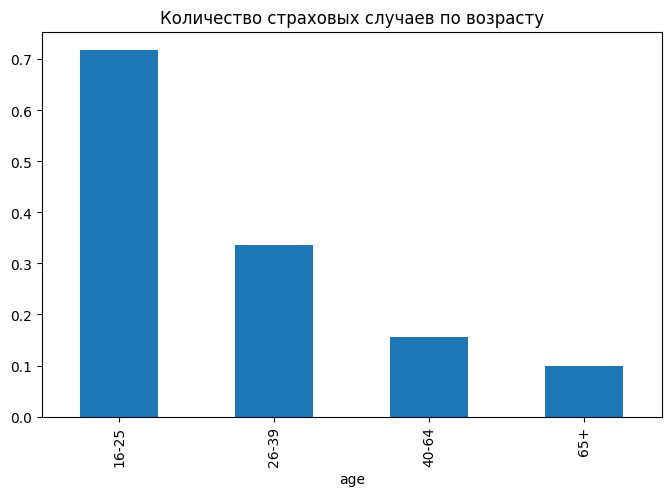

In [ ]:
plt.figure(figsize=[8, 5])
df.groupby('age')['claim_rate'].mean().plot(kind="bar")
plt.title("Количество страховых случаев по возрасту")
plt.show()

Более молодые люди с большей вероятностью заявят о страховом случае. Теперь посмотрим на "vehicle_year".

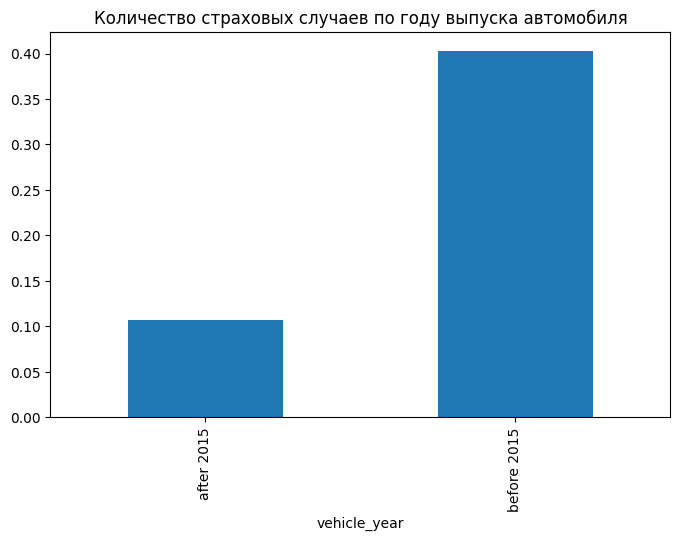

In [ ]:
plt.figure(figsize=[8, 5])
df.groupby('vehicle_year')['claim_rate'].mean().plot(kind="bar")
plt.title("Количество страховых случаев по году выпуска автомобиля")
plt.show()

Клиенты с более старыми автомобилями имеют гораздо больше шансов заявить о страховом случае.


Теперь изучим взаимосвязь страховых случаев с образованием и доходом при помощи столбчатых диаграмм.

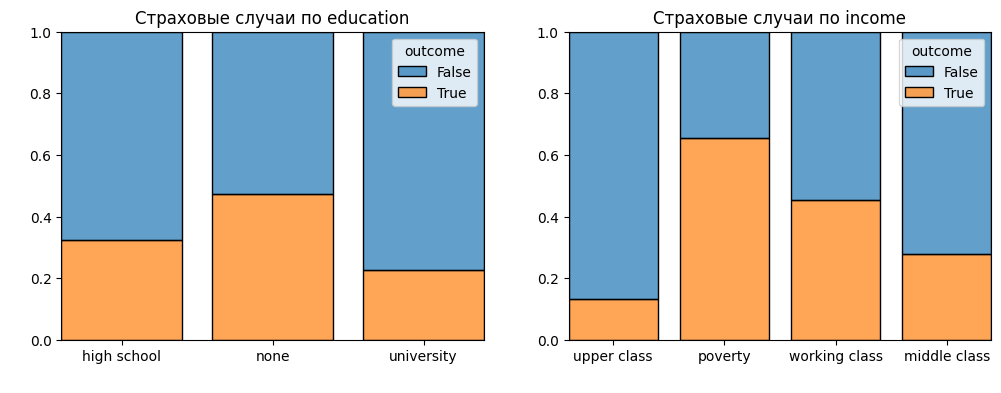

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(12,4))

for i,col in enumerate(["education", "income"]):
    sns.histplot(df, ax=axes[i], x=col, hue="outcome", stat="probability", multiple="fill", shrink=.8, alpha=0.7)
    axes[i].set(title="Страховые случаи по " + col, ylabel=" ", xlabel=" ")

Клиенты без образования имеют больше шансов заявить о страховом случае, аналогично с низким уровнем дохода.

## Многофакторный анализ

Такой анализ предполагает изучение взаимосвязи нескольких признаков. Часто для этого используется тепловые карты. Изучим взаимосвязь между образованием, доходом и количеством страховых случаев. Для этого сначала построим сводную таблицу.

In [ ]:
edu_income = pd.pivot_table(data=df, index='education', columns='income', values='claim_rate', aggfunc='mean')
edu_income

income,middle class,poverty,upper class,working class
education,,,,
high school,0.255396,0.671662,0.118347,0.450736
none,0.209790,0.640895,0.098592,0.394841
university,0.335135,0.649485,0.143167,0.550769


Далее передадим сводную таблицу в функцию `heatmap()`.

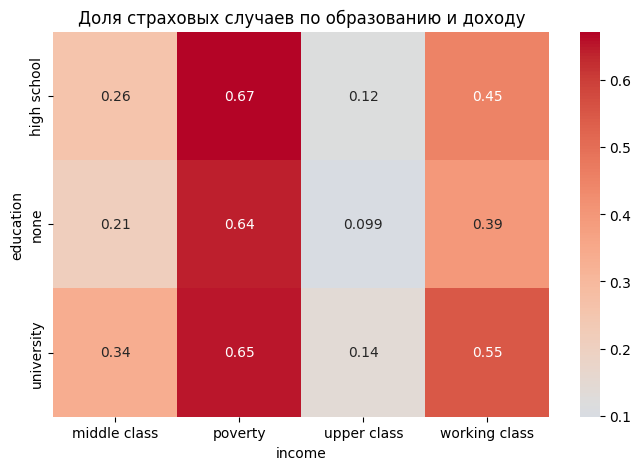

In [ ]:
plt.figure(figsize=[8, 5])
sns.heatmap(edu_income, annot=True, cmap='coolwarm',center=0.117)
plt.title("Доля страховых случаев по образованию и доходу")
plt.show()

Клиенты со средним образованием и низким доходом имеют самую большую долю страховых случаев. За ними следуют выпускники университетов с низким доходом. Клиенты с высоким доходом без образования имеют наименьшую долю страховых случаев.

То же самое сделаем для водительского стажа и семейного положения.

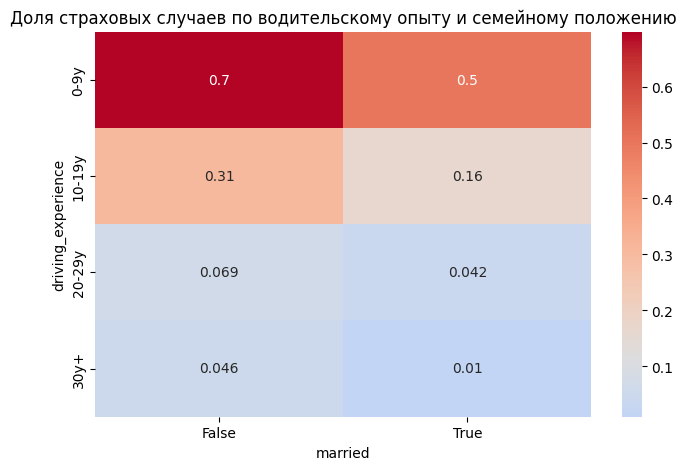

In [ ]:
driv_married = pd.pivot_table(data=df, index='driving_experience', columns='married', values='claim_rate')

plt.figure(figsize=[8,5])
sns.heatmap(driv_married, annot=True, cmap='coolwarm', center=0.117)
plt.title("Доля страховых случаев по водительскому опыту и семейному положению")
plt.show()

Клиенты не в браке со стажем вождения от 0 до 9 лет, имеют наибольшую вероятность страхового случая, а лица, состоящие в браке и имеющие стаж вождения от 30 лет, имеют наименьшую вероятность подачи заявления.

Теперь построим тепловую карту для визуализации взаимосвязи пола, семейного положения и количества страховых случаев.

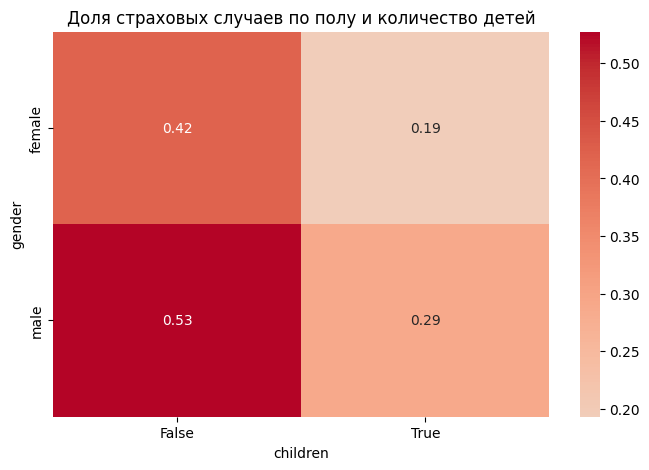

In [ ]:
gender_children = pd.pivot_table(data=df, index='gender', columns='children', values='claim_rate')

plt.figure(figsize=[8, 5])
sns.heatmap(gender_children,annot=True,cmap='coolwarm', center=0.117)
plt.title("Доля страховых случаев по полу и количество детей")
plt.show()

У мужчин без детей чаще всего возникают страховые случаи, а женщины с детьми – реже.

## Что ещё почитать?

- [Как изменить значение в зависимости от условия в Pandas](https://teletype.in/@pythontalk/change_value_pandas)
- [От широких датафреймов к длинным и обратно](https://teletype.in/@pythontalk/pivot_mellt_pandas)
- [Всё о методе shift()](https://teletype.in/@pythontalk/pandas_shift)
- [query и eval в pandas](https://teletype.in/@pythontalk/query_eval_pandas)